# Data Wrangling - Audio Metadata
The audio clips used in this project came from two separate databases with different naming conventions. Before getting into the audio filtering and feature selection, I want to create a csv with all the data for each audio clip neatly combined so that I can use it as a legend of sorts.

Both databases store information in the filename of each clip. In the case for CREMA-D, more information concerning the actors are found in a separate file `CREMA-D Actors.csv`.

By the end of this process, I’ll have a singular file, `Audio Legend.csv` with the following columns:

 - Path: path to the audio clip
 - Original: the original clip filename
 - Original: the original clip filename
 - Statement: an integer denoting which of the fourteen phrases was used
 - Emotion: the emotion portrayed in the clip
 - Sex: the sex of the actor



In [1]:
import numpy as np
import os
import pandas as pd
import zipfile
# For Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
# Set up a color map
viridis = cm.get_cmap('viridis', lut=8)
viridis = viridis.colors

# Collection
Going into the `Data` folder to select the filenames of each audio clip, breaking their names into the respective components, and saving them into a separate dataframe for each database.

In [2]:
data_RAVDESS = pd.DataFrame()
error = []

folder='Data/Audio/Raw/RAVDESS/'
for count, track in enumerate(os.listdir(folder),start=1):
    path = folder+track
    totsum = len(os.listdir(folder))
    try:
        # make a list using the clip name
        metadata = [path[:-len(track)],track]
        # cut up the name into its seperate components and append to the list
        [metadata.append(int(x)) for x in track[:-4].split('-')]
        # add the list to the RAVDESS dataset
        data_RAVDESS = data_RAVDESS.append([metadata])
    except:
        error.append(track)
    # progress bar
    print('%4d of %d complete (%d%%)' % (count,totsum,(count/totsum)*100),end='\r')
    count+=1
            
data_RAVDESS.head()

,0,1,2,3,4,5,6,7,8
0,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-01.wav,3,1,1,1,1,1,1
0,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-02.wav,3,1,1,1,1,1,2
0,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-03.wav,3,1,1,1,1,1,3
0,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-04.wav,3,1,1,1,1,1,4
0,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-05.wav,3,1,1,1,1,1,5


In [3]:
data_CREMA_D = pd.DataFrame()

folder='Data/Audio/Raw/CREMA_D/'
for count, track in enumerate(os.listdir(folder),start=1):
    path = folder+track
    totsum = len(os.listdir(folder))
    try:
        # make a list using the clip name
        metadata = [path[:-len(track)],track]
        # cut up the name into its seperate components and append to the list
        [metadata.append(x) for x in track[:-4].split('_')]
         # add the list to the CREMA-D dataset
        data_CREMA_D = data_CREMA_D.append([metadata])
    except:
        error.append(track)
    # progress bar
    print('%4d of %d complete (%d%%)' % (count,totsum,(count/totsum)*100),end='\r')
    count+=1
        
data_CREMA_D.head()

,0,1,2,3,4,5
0,Data/Audio/Raw/CREMA_D/,1001_DFA_ANG_XX.wav,1001,DFA,ANG,XX
0,Data/Audio/Raw/CREMA_D/,1001_DFA_DIS_XX.wav,1001,DFA,DIS,XX
0,Data/Audio/Raw/CREMA_D/,1001_DFA_FEA_XX.wav,1001,DFA,FEA,XX
0,Data/Audio/Raw/CREMA_D/,1001_DFA_HAP_XX.wav,1001,DFA,HAP,XX
0,Data/Audio/Raw/CREMA_D/,1001_DFA_NEU_XX.wav,1001,DFA,NEU,XX


# Cleaning
Clean and combine both datasets

In [4]:
# change index to a range of ints
data_RAVDESS.index = pd.RangeIndex(0,stop = len(data_RAVDESS))
data_CREMA_D.index = pd.RangeIndex(0,stop = len(data_CREMA_D))

# drop unnecessary columns
data_RAVDESS = data_RAVDESS.drop(columns=[2,3,5,7])
data_CREMA_D = data_CREMA_D.drop(columns=[5])

# rename columns
data_RAVDESS.columns=['path','original','emotion','statment','actorID']
data_CREMA_D.columns=['path','original','ActorID','statment','emotion']

# make sure id is an int not an object
data_CREMA_D[['ActorID']] = data_CREMA_D[['ActorID']].astype('int')

data_RAVDESS.info()
data_CREMA_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      1440 non-null   object
 1   original  1440 non-null   object
 2   emotion   1440 non-null   int64 
 3   statment  1440 non-null   int64 
 4   actorID   1440 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 56.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      7442 non-null   object
 1   original  7442 non-null   object
 2   ActorID   7442 non-null   int32 
 3   statment  7442 non-null   object
 4   emotion   7442 non-null   object
dtypes: int32(1), object(4)
memory usage: 261.8+ KB


### Label Convention
Make sure that both datasets have the same column labels

In [5]:
# Make all the emotions human redable
for i,j in [('ANG','anger'),('DIS','disgust'),('FEA','fear'),('NEU','neutral'),('HAP','happy'),('SAD','sad')]:
    data_CREMA_D['emotion'] = data_CREMA_D['emotion'].str.replace(i,j)
    
for i,j in [(1,'neutral'),(2,'calm'),(3,'happy'),(4,'sad'),(5,'anger'),(6,'fear'),(7,'disgust'),(8,'surprised')]:
    data_RAVDESS['emotion'] = data_RAVDESS['emotion'].replace(i,j)

In [6]:
# Actor gender
CREMA_D = pd.read_csv('Data/CSVs/CREMA_D Actors.csv',index_col='Unnamed: 0')
data_CREMA_D = data_CREMA_D.merge(CREMA_D[['Sex','ActorID']],on='ActorID',how='inner')
data_CREMA_D = data_CREMA_D.drop(columns='ActorID').rename(columns={'Sex':'sex'})

data_RAVDESS['actorID'] = data_RAVDESS['actorID'] % 2
data_RAVDESS['actorID'] = data_RAVDESS['actorID'].replace(1,'Male').replace(0,'Female')
data_RAVDESS = data_RAVDESS.rename(columns={'actorID':'sex'})

In [7]:
# change the statement convention
for i,j in enumerate(data_CREMA_D['statment'].unique(),start=3):
    data_CREMA_D['statment'] = data_CREMA_D['statment'].replace(j,i)

Overall there are 14 total statements used:

- 1: Kids are talking by the door.
- 2: Dogs are sitting by the door.
- 3: Don't forget a jacket.
- 4: It's eleven o'clock.
- 5: I'm on my way to the meeting.
- 6: I think I have a doctor's appointment.
- 7 I think I've seen this before.
- 8: I would like a new alarm clock.
- 9: I wonder what this is about.
- 10: Maybe tomorrow it will be cold.
- 11: The airplane is almost full.
- 12: That is exactly what happened.
- 13: The surface is slick.
- 14: We'll stop in a couple of minutes.

### Final Check
Make sure the columns and column labels are the same.

In [8]:
data_CREMA_D.head()

,path,original,statment,emotion,sex
0,Data/Audio/Raw/CREMA_D/,1001_DFA_ANG_XX.wav,3,anger,Male
1,Data/Audio/Raw/CREMA_D/,1001_DFA_DIS_XX.wav,3,disgust,Male
2,Data/Audio/Raw/CREMA_D/,1001_DFA_FEA_XX.wav,3,fear,Male
3,Data/Audio/Raw/CREMA_D/,1001_DFA_HAP_XX.wav,3,happy,Male
4,Data/Audio/Raw/CREMA_D/,1001_DFA_NEU_XX.wav,3,neutral,Male


In [9]:
data_RAVDESS.head()

,path,original,emotion,statment,sex
0,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-01.wav,neutral,1,Male
1,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-02.wav,neutral,1,Female
2,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-03.wav,neutral,1,Male
3,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-04.wav,neutral,1,Female
4,Data/Audio/Raw/RAVDESS/,03-01-01-01-01-01-05.wav,neutral,1,Male


In [10]:
# append data together
data = data_CREMA_D.append(data_RAVDESS)
data.index = pd.RangeIndex(0,len(data))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8882 entries, 0 to 8881
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      8882 non-null   object
 1   original  8882 non-null   object
 2   statment  8882 non-null   int64 
 3   emotion   8882 non-null   object
 4   sex       8882 non-null   object
dtypes: int64(1), object(4)
memory usage: 347.1+ KB


# Some EDA
Take a quick look at the data to find any interesting qualities. 
### Emotions

In [11]:
data['emotion'].value_counts()

sad          1463
anger        1463
disgust      1463
fear         1463
happy        1463
neutral      1183
surprised     192
calm          192
Name: emotion, dtype: int64

CREMA-D is significantly larger than RAVDESS and since it does not contain the `calm` or `surprised` labels, these emotions are highly underrepresented in the dataset. I went into the RADVESS voice clips and compared these to the other emotions. Overall, while I believe that `calm` can easily be added to the `neutral` label, the`surprised` label doesn’t really fit well with any of the other emotions and will be dropped.

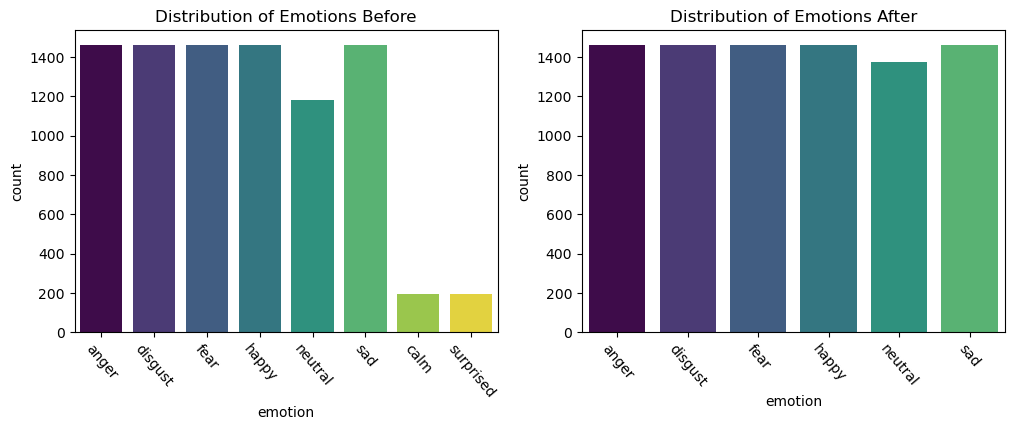

In [12]:
plt.figure(figsize=(12,4),dpi=100)
          
plt.subplot(121)
sns.countplot(data=data, x='emotion',palette=viridis)
plt.xticks(rotation=-50)
plt.title('Distribution of Emotions Before')

data['emotion'] = data['emotion'].str.replace('calm','neutral')
to_drop = data[data['emotion']=='surprised']
data = data.drop(index = to_drop.index)

plt.subplot(122)
sns.countplot(data=data, x='emotion',palette=viridis)
plt.title('Distribution of Emotions After')
plt.xticks(rotation=-50);

### Statments

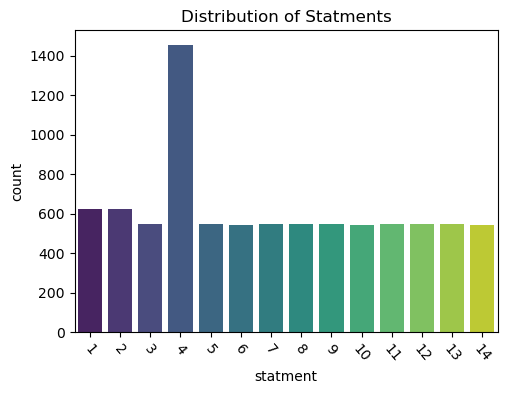

In [13]:
plt.figure(figsize=(12,4),dpi=100)
          
plt.subplot(121)
sns.countplot(data=data, x='statment',palette='viridis')
plt.xticks(rotation=-50)
plt.title('Distribution of Statments');

There are significantly more clips using phrase 4 (“It's eleven o'clock.”). At first I thought that this may have been due to an error in the renaming process, but upon investigation I came to the conclusion that there are indeed just twice as many clips using this phrase than the others. I’m not 100% sure why this may be, but currently my assumption is that it was the most commonly selected phrase by the CREMA-D actors due to the fact it's the shortest phrase offered.

For now I’ll let it be, but I’m going to be on the lookout for how this imbalance may affect the model.

### Gender

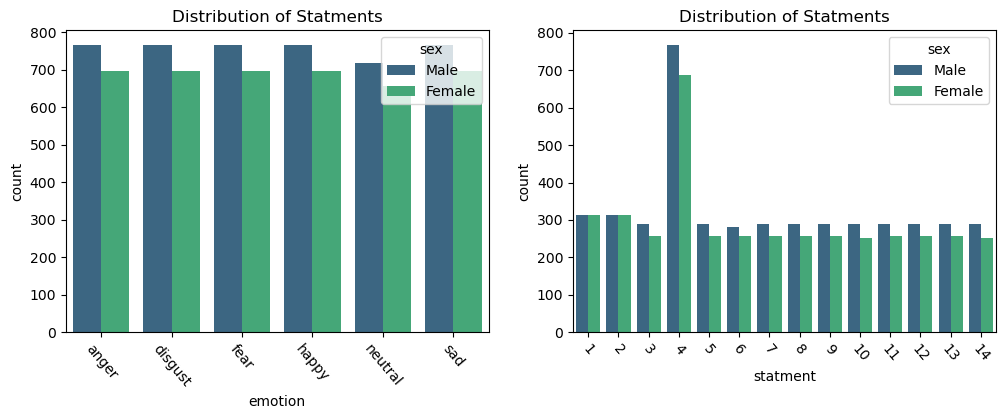

In [14]:
plt.figure(figsize=(12,4),dpi=100)
          
plt.subplot(121)
sns.countplot(data=data, x='emotion',hue='sex',palette='viridis')
plt.xticks(rotation=-50)
plt.title('Distribution of Statments')

plt.subplot(122)
sns.countplot(data=data, x='statment',hue='sex',palette='viridis')
plt.xticks(rotation=-50)
plt.title('Distribution of Statments');

Overall there are slightly more clips from male actors than female actors. Despite this, it appears that there's a pretty good balance among the emotions and statements. 

# Save File
Now that I have a nice legend of all the audio clips I want to use, lets save everything into a nice csv file!

In [15]:
#save as csv
data.to_csv('Data/CSVs/Audio Legend Raw.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8690 entries, 0 to 8689
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      8690 non-null   object
 1   original  8690 non-null   object
 2   statment  8690 non-null   int64 
 3   emotion   8690 non-null   object
 4   sex       8690 non-null   object
dtypes: int64(1), object(4)
memory usage: 665.4+ KB
